**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>21BM681 Machine Learning and Embedded Programming Lab 11</center>

### <center>Convolutional Neural Network</center>

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

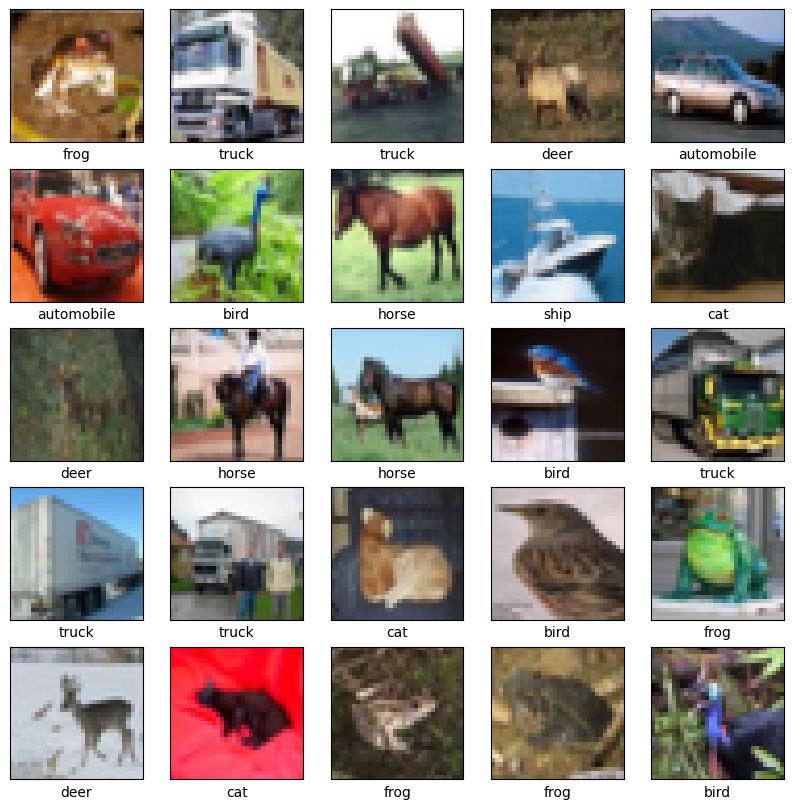

In [51]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
TestLable,TrainLable = test_labels,train_labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[TrainLable[i][0]])
plt.show()

In [50]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [18]:
# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 43s 67ms/step - loss: 1.6196 - accuracy: 0.4049 - val_loss: 1.3841 - val_accuracy: 0.5016
Epoch 2/10
625/625 [==============================] - 40s 64ms/step - loss: 1.2678 - accuracy: 0.5491 - val_loss: 1.1580 - val_accuracy: 0.5978
Epoch 3/10
625/625 [==============================] - 41s 65ms/step - loss: 1.1076 - accuracy: 0.6099 - val_loss: 1.1349 - val_accuracy: 0.6047
Epoch 4/10
625/625 [==============================] - 38s 61ms/step - loss: 1.0002 - accuracy: 0.6483 - val_loss: 1.0328 - val_accuracy: 0.6369
Epoch 5/10
625/625 [==============================] - 40s 64ms/step - loss: 0.9261 - accuracy: 0.6765 - val_loss: 0.9910 - val_accuracy: 0.6627
Epoch 6/10
625/625 [==============================] - 39s 63ms/step - loss: 0.8517 - accuracy: 0.7031 - val_loss: 0.9350 - val_accuracy: 0.6772
Epoch 7/10
625/625 [==============================] - 40s 64ms/step - loss: 0.7987 - accuracy: 0.7219 - val_loss: 0.9544 - val_accuracy:

In [36]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 3s 10ms/step - loss: 0.9067 - accuracy: 0.6937
Test accuracy: 69.37%


In [57]:
pred_lable = model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


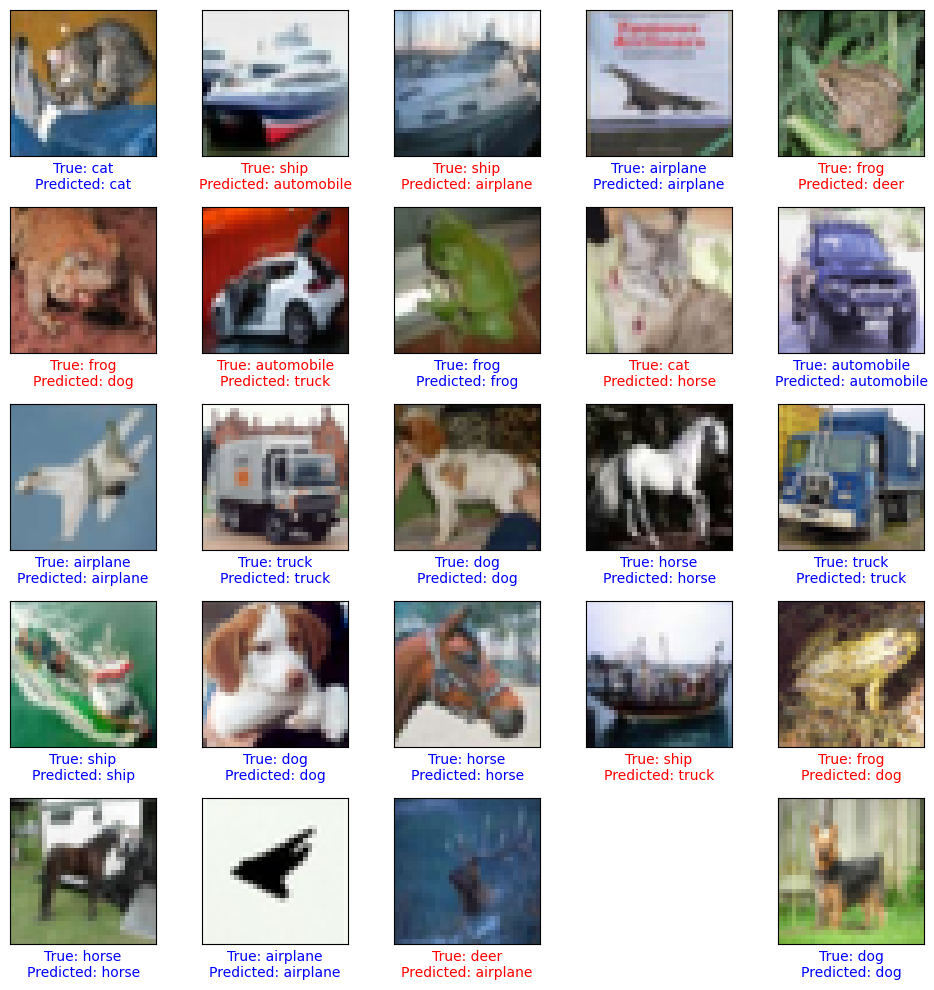

In [58]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    true_label = int(TestLable[i][0])
    predicted_label = int(tf.argmax(pred_lable[i]))
    true_class_name = class_names[true_label]
    predicted_class_name = class_names[predicted_label]
    plt.xlabel(f'True: {true_class_name}\nPredicted: {predicted_class_name}', color='blue' if true_label == predicted_label else 'red')
    plt.tight_layout()
plt.show()